In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("dataset.csv")

In [2]:
data.head(20)

,Job Title,Company,Location,Experience Level,Salary,Industry,Required Skills
0,Early years teacher,Richardson Ltd,Sydney,Senior Level,87000.0,Healthcare,Pharmaceuticals
1,Counselling psychologist,"Ramos, Santiago and Stewart",San Francisco,Mid Level,50000.0,Marketing,"Google Ads, SEO, Content Writing"
2,Radio broadcast assistant,Franco Group,New York,Mid Level,77000.0,Healthcare,"Patient Care, Nursing, Medical Research, Pharm..."
3,"Designer, exhibition/display",Collins Inc,Berlin,Senior Level,90000.0,Software,Machine Learning
4,"Psychotherapist, dance movement",Barker Group,Sydney,Entry Level,112000.0,Healthcare,"Nursing, Medical Research, Pharmaceuticals"
5,Early years teacher,Dawson-Hudson,Sydney,Mid Level,93000.0,Finance,"Financial Modeling, Risk Analysis"
6,Academic librarian,Clark Ltd,London,Entry Level,104000.0,Healthcare,Pharmaceuticals
7,Quantity surveyor,Dean-Delacruz,Sydney,Entry Level,123000.0,Software,"Java, Python"
8,Archaeologist,Williams LLC,New York,Senior Level,102000.0,Finance,"Python, SQL, Risk Analysis"
9,Mining engineer,Berg LLC,London,Senior Level,67000.0,Manufacturing,Production Planning


{'whiskers': [<matplotlib.lines.Line2D at 0x21aa4aea270>,
 'caps': [<matplotlib.lines.Line2D at 0x21aa4aea6f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21aa4aea030>],
 'medians': [<matplotlib.lines.Line2D at 0x21aa4aeacc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21aa4aeaf90>],
 'means': []}

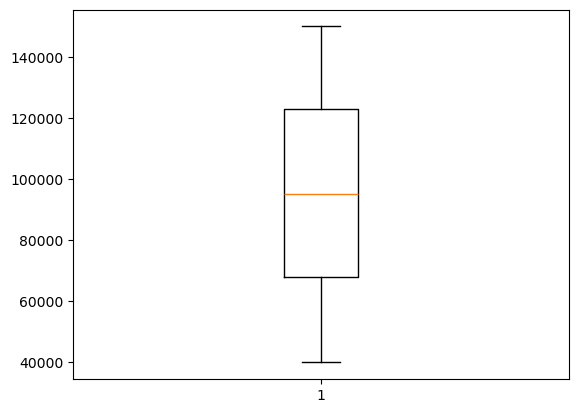

In [3]:
plt.boxplot(data['Salary'])

In [4]:
data['Required Skills'].unique()


array(['Pharmaceuticals', 'Google Ads, SEO, Content Writing',
       'Patient Care, Nursing, Medical Research, Pharmaceuticals', ...,
       'React, C++, Java, Machine Learning', 'Python, Java, React, AWS',
       'Machine Learning, Python, C++, AWS'], dtype=object)

In [5]:
data = pd.get_dummies(data, columns=['Location','Industry'], drop_first=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Job Title               50000 non-null  object 
 1   Company                 50000 non-null  object 
 2   Experience Level        50000 non-null  object 
 3   Salary                  50000 non-null  float64
 4   Required Skills         50000 non-null  object 
 5   Location_Berlin         50000 non-null  bool   
 6   Location_London         50000 non-null  bool   
 7   Location_New York       50000 non-null  bool   
 8   Location_San Francisco  50000 non-null  bool   
 9   Location_Sydney         50000 non-null  bool   
 10  Location_Toronto        50000 non-null  bool   
 11  Industry_Finance        50000 non-null  bool   
 12  Industry_Healthcare     50000 non-null  bool   
 13  Industry_Manufacturing  50000 non-null  bool   
 14  Industry_Marketing      50000 non-null

In [7]:
data.drop(columns='Job Title',inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 50000 non-null  object 
 1   Experience Level        50000 non-null  object 
 2   Salary                  50000 non-null  float64
 3   Required Skills         50000 non-null  object 
 4   Location_Berlin         50000 non-null  bool   
 5   Location_London         50000 non-null  bool   
 6   Location_New York       50000 non-null  bool   
 7   Location_San Francisco  50000 non-null  bool   
 8   Location_Sydney         50000 non-null  bool   
 9   Location_Toronto        50000 non-null  bool   
 10  Industry_Finance        50000 non-null  bool   
 11  Industry_Healthcare     50000 non-null  bool   
 12  Industry_Manufacturing  50000 non-null  bool   
 13  Industry_Marketing      50000 non-null  bool   
 14  Industry_Retail         50000 non-null

In [9]:
data.columns

Index(['Company', 'Experience Level', 'Salary', 'Required Skills',
       'Location_Berlin', 'Location_London', 'Location_New York',
       'Location_San Francisco', 'Location_Sydney', 'Location_Toronto',
       'Industry_Finance', 'Industry_Healthcare', 'Industry_Manufacturing',
       'Industry_Marketing', 'Industry_Retail', 'Industry_Software'],
      dtype='object')

In [10]:
company_table=data.groupby('Company').agg({'Salary' : 'mean'}).sort_values('Salary',ascending=True)
skills_table=data.groupby('Required Skills').agg({'Salary' : 'mean'}).sort_values('Salary',ascending=True)

In [11]:
company_table['company_group']=pd.cut(company_table['Salary'],bins=10,labels=['company0','company1','company2','company3','company4','company5','company6','company7','company8','company9'])
company_table.drop(columns='Salary')

,company_group
Company,
Matthews-Brown,company0
Ramsey-Adams,company0
"Chambers, Duncan and Ritter",company0
"Burns, Carr and Villanueva",company0
"Jones, Webb and Fisher",company0
...,...
Rodriguez-Bailey,company9
Hammond-Swanson,company9
"Jackson, Wilson and Vasquez",company9


In [12]:
skills_table['skill_group']=pd.cut(skills_table['Salary'],bins=10,labels=['skill0','skill1','skill2','skill3','skill4','skill5','skill6','skill7','skill8','skill9'])
skills_table.drop(columns='Salary')

,skill_group
Required Skills,
"SQL, Python, C++, AWS",skill0
"SQL, Python, Java, C++",skill0
"C++, AWS, SQL, Java",skill0
"Java, React, Python, C++",skill0
"SQL, AWS, Machine Learning, Java",skill0
...,...
"Machine Learning, Java, AWS, SQL",skill9
"Machine Learning, C++, Java, SQL",skill9
"Java, SQL, C++, Python",skill9


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 50000 non-null  object 
 1   Experience Level        50000 non-null  object 
 2   Salary                  50000 non-null  float64
 3   Required Skills         50000 non-null  object 
 4   Location_Berlin         50000 non-null  bool   
 5   Location_London         50000 non-null  bool   
 6   Location_New York       50000 non-null  bool   
 7   Location_San Francisco  50000 non-null  bool   
 8   Location_Sydney         50000 non-null  bool   
 9   Location_Toronto        50000 non-null  bool   
 10  Industry_Finance        50000 non-null  bool   
 11  Industry_Healthcare     50000 non-null  bool   
 12  Industry_Manufacturing  50000 non-null  bool   
 13  Industry_Marketing      50000 non-null  bool   
 14  Industry_Retail         50000 non-null

data.head()

In [14]:
data=pd.merge(data,company_table,left_on='Company',how='left',right_index=True)
data=pd.merge(data,skills_table,left_on='Required Skills',how='left',right_index=True)

In [15]:
data.drop(columns=['Company','Required Skills'],inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Experience Level        50000 non-null  object  
 1   Salary_x                50000 non-null  float64 
 2   Location_Berlin         50000 non-null  bool    
 3   Location_London         50000 non-null  bool    
 4   Location_New York       50000 non-null  bool    
 5   Location_San Francisco  50000 non-null  bool    
 6   Location_Sydney         50000 non-null  bool    
 7   Location_Toronto        50000 non-null  bool    
 8   Industry_Finance        50000 non-null  bool    
 9   Industry_Healthcare     50000 non-null  bool    
 10  Industry_Manufacturing  50000 non-null  bool    
 11  Industry_Marketing      50000 non-null  bool    
 12  Industry_Retail         50000 non-null  bool    
 13  Industry_Software       50000 non-null  bool    
 14  Salary_y              

In [17]:
data = pd.get_dummies(data, columns=['company_group','skill_group'], drop_first=True)

In [19]:
data = pd.get_dummies(data, columns=['Experience Level'], drop_first=True)

In [21]:
data.drop(columns=['Salary_x','Salary_y'],inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Location_Berlin                50000 non-null  bool   
 1   Location_London                50000 non-null  bool   
 2   Location_New York              50000 non-null  bool   
 3   Location_San Francisco         50000 non-null  bool   
 4   Location_Sydney                50000 non-null  bool   
 5   Location_Toronto               50000 non-null  bool   
 6   Industry_Finance               50000 non-null  bool   
 7   Industry_Healthcare            50000 non-null  bool   
 8   Industry_Manufacturing         50000 non-null  bool   
 9   Industry_Marketing             50000 non-null  bool   
 10  Industry_Retail                50000 non-null  bool   
 11  Industry_Software              50000 non-null  bool   
 12  Salary                         50000 non-null 

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import r2_score
x = data.iloc[:, 0:32]  # Select all columns from 0 to 31
y = data.iloc[:, 12]    # Select the target variable using iloc

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
#print('NRMSE:', (np.sqrt(mean_squared_error(y_test, y_pred)))/(maxi-mini))
print(f"R^2 Score for the Linear Regression model: {r2:.9f}")

RMSE: 5.1335924439872044e-11
R^2 Score for the Linear Regression model: 1.000000000
